In [2]:
#Dataset https://www.kaggle.com/datasets/danielgrijalvas/movies

import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)

In [41]:
df=pd.read_csv('movies.csv')

In [4]:
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [5]:
#Vamos a limpiar los datos
#Chequeamos si hay datos faltantes
for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print ('{} - {}%'.format(col,pct_missing))



name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [6]:
#otra forma de hacerlo 

df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [7]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [8]:
#tenemos variables en presupuesto e ingreso sin valores. Como vamos a hacer correlación, reemplazar esos valores por cero, me haria tener una estimación poco robusta 
#Entonces eliminamos las filas en las que alguna de esas dos columnas presente valores nulos 
df= df.dropna(subset=['budget'])
df= df.dropna(subset=['gross'])

In [9]:
df.isnull().sum()


name         0
rating      12
genre        0
year         0
released     0
score        0
votes        0
director     0
writer       0
star         0
country      1
budget       0
gross        0
company      2
runtime      1
dtype: int64

In [10]:
df['budget']= df['budget'].astype('int64')
df['gross']= df['gross'].astype('int64')
df['votes']= df['votes'].astype('int64')


In [13]:
#Existe una columna de Año y otra de fecha de estreno. El año de ambas debería coincidir pero no lo hace. 
#Vamos a crear una nueva columna, partiendo la de fecha de estreno para quedarnos con ese año puntual 
#nos encontramos con que la columna 'released' tiene un agregado que es, entre parentesis, Estados Unidos. 
#Vamos a partir esa columna en dos para que nos quede sólo la fecha en una y luego a partir de ahi partirla para quedarnos sólo con el año

released=df['released'].astype(str).str.split('(', expand=True)
released.columns = ['date_released', 'year_1']
df = pd.concat([df, released], axis=1)


In [14]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date_released,year_1
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,"June 13, 1980",United States)
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,"July 2, 1980",United States)
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,"June 20, 1980",United States)
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,"July 2, 1980",United States)
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,"July 25, 1980",United States)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,"January 17, 2020",United States)
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,"February 14, 2020",United States)
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,"January 17, 2020",United States)
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,"February 21, 2020",United States)


In [15]:
df['year_correct']=df['date_released'].astype(str).str[-5:]

In [16]:
df = df.drop(columns=['date_released', 'year_1'])

In [43]:
df= df.sort_values(by=['gross'], inplace=False, ascending=False)

In [18]:
#Eliminamos los valores duplicados, si es que hay

df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982
2417,Madadayo,NaN,Drama,1993,"April 17, 1993 (Japan)",7.3,5100,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0,1993


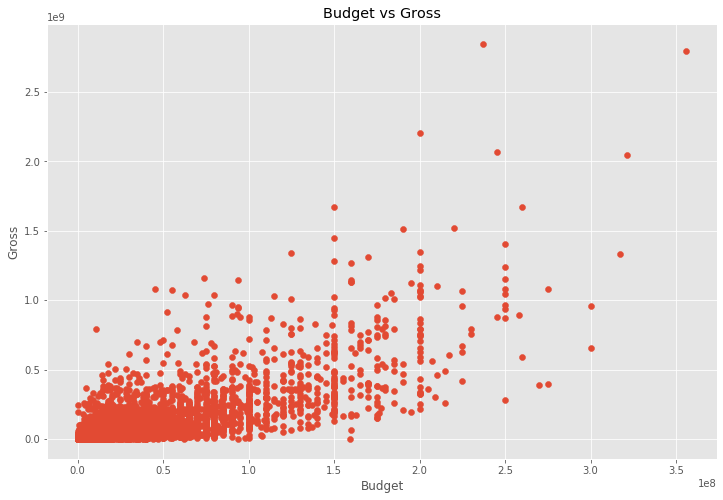

In [19]:
#Vamos a testear si existe correlación entre presupuesto gastado y recaudación de la pelicula 

#Scatterplot de budget vs gross

plt.scatter(x=df['budget'], y= df['gross'])
plt.title("Budget vs Gross")
plt.xlabel("Budget")
plt.ylabel("Gross")
plt.show()

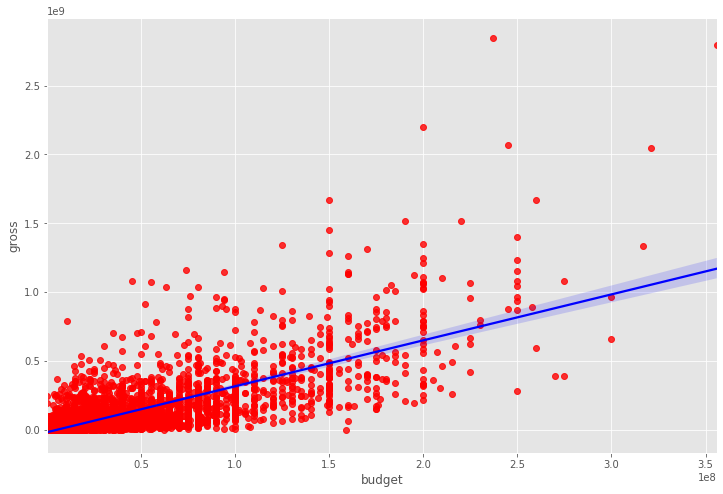

In [20]:
#Plot usando seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"},line_kws={"color":"blue"} )

In [21]:
#por cuanto hay correlación 
#(tener en cuenta que con este comando solo vamos a ver correlación entre valores númericos. Si quisieramos ver compania vs budget no sirve)

In [22]:
#metodo pearson
df.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.055174,0.205758,0.327781,0.274264,0.074203
score,0.055174,1.000000,0.473809,0.071792,0.222143,0.414580
votes,0.205758,0.473809,1.000000,0.440021,0.614904,0.352437
budget,0.327781,0.071792,0.440021,1.000000,0.740395,0.318595
gross,0.274264,0.222143,0.614904,0.740395,1.000000,0.275596
runtime,0.074203,0.414580,0.352437,0.318595,0.275596,1.000000


In [23]:
#metodo kendall
df.corr(method="kendall")

,year,score,votes,budget,gross,runtime
year,1.000000,0.038391,0.295884,0.220991,0.239313,0.064106
score,0.038391,1.000000,0.350111,-0.006518,0.124715,0.292872
votes,0.295884,0.350111,1.000000,0.346228,0.553640,0.205616
budget,0.220991,-0.006518,0.346228,1.000000,0.512637,0.230879
gross,0.239313,0.124715,0.553640,0.512637,1.000000,0.176825
runtime,0.064106,0.292872,0.205616,0.230879,0.176825,1.000000


In [24]:
#metodo spearman 
df.corr(method="spearman")

,year,score,votes,budget,gross,runtime
year,1.000000,0.056269,0.426571,0.313199,0.350679,0.094396
score,0.056269,1.000000,0.495379,-0.010133,0.182857,0.413040
votes,0.426571,0.495379,1.000000,0.493404,0.745815,0.300959
budget,0.313199,-0.010133,0.493404,1.000000,0.693670,0.330276
gross,0.350679,0.182857,0.745815,0.693670,1.000000,0.257121
runtime,0.094396,0.413040,0.300959,0.330276,0.257121,1.000000


In [25]:
#volvemos al metodo pearson 
df.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.055174,0.205758,0.327781,0.274264,0.074203
score,0.055174,1.000000,0.473809,0.071792,0.222143,0.414580
votes,0.205758,0.473809,1.000000,0.440021,0.614904,0.352437
budget,0.327781,0.071792,0.440021,1.000000,0.740395,0.318595
gross,0.274264,0.222143,0.614904,0.740395,1.000000,0.275596
runtime,0.074203,0.414580,0.352437,0.318595,0.275596,1.000000


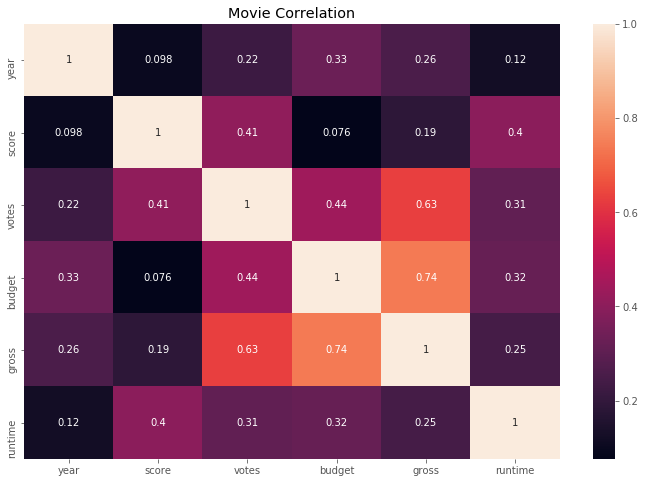

In [45]:
#vemos que hay una alta correlación entre el presupuesto y el ingreso. Vamos a visualizarlo
#primero creamos la matrix

correlation_matrix= df.corr(method="pearson")
sns.heatmap(correlation_matrix, annot=True)
plt.title("Movie Correlation")
plt.show()

In [28]:
#Veamos ahora la correlacion con la compania, que es una variable no númerica 
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [35]:
df.dtypes

name             object
rating           object
genre            object
year              int64
released         object
score           float64
votes             int64
director         object
writer           object
star             object
country          object
budget            int64
gross             int64
company          object
runtime         float64
year_correct     object
dtype: object

In [50]:
df_numerized= df
for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype== "object"):
        df_numerized[col_name]= df_numerized[col_name].astype("category")
        df_numerized[col_name]=df_numerized[col_name].cat.codes
    
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000.0,2.847246e+09,2253,162.0
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000.0,2.797501e+09,1606,181.0
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000.0,2.201647e+09,2253,194.0
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000.0,2.069522e+09,1540,138.0
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000.0,2.048360e+09,1606,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,-1,6,2020,2964,3.1,18.0,1500,2289,2421,55,7000.0,NaN,-1,90.0
7664,1678,-1,4,2020,1107,4.7,36.0,774,2614,1886,55,NaN,NaN,539,90.0
7665,4717,-1,6,2020,193,5.7,29.0,2061,2683,2040,55,58750.0,NaN,941,NaN
7666,2843,-1,6,2020,2817,NaN,NaN,1184,1824,450,55,15000.0,NaN,-1,120.0


In [40]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,387,5,0,2009,528,7.8,1100000,787,1265,1538,47,237000000,2847246203,1388,162.0,29
7445,389,5,0,2019,138,8.4,903000,106,515,1474,47,356000000,2797501328,987,181.0,39
3045,4923,5,6,1997,535,7.8,1100000,787,1265,1076,47,200000000,2201647264,1388,194.0,17
6663,3656,5,0,2015,530,7.8,876000,770,1810,357,47,245000000,2069521700,949,138.0,35
7244,390,5,0,2018,146,8.4,897000,106,515,1474,47,321000000,2048359754,987,149.0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,2981,5,0,1993,1471,4.5,1900,1810,3112,187,47,5000000,2970,1382,97.0,14
3681,1599,3,6,2000,1726,6.8,43000,954,1687,528,6,5000000,2554,468,108.0,21
272,2921,6,9,1982,1530,3.9,2300,263,55,1477,47,800000,2270,584,85.0,2
2417,2401,-1,6,1993,64,7.3,5100,23,1220,1687,26,11900000,596,492,134.0,13


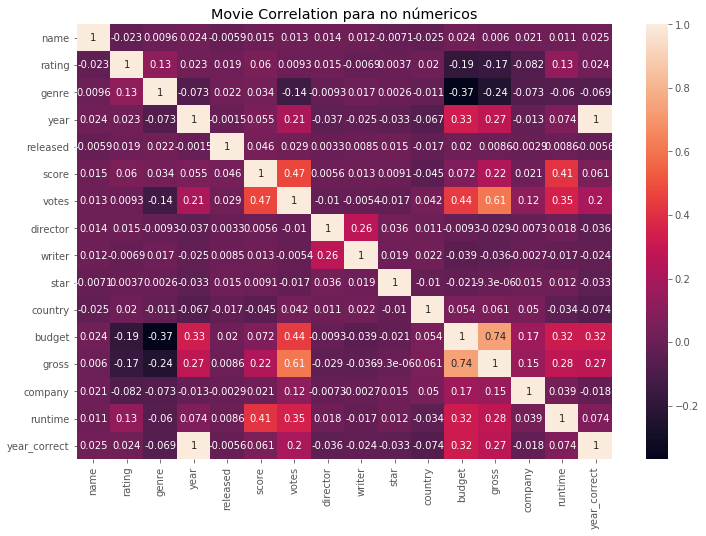

In [47]:
#No importa cual es cual porque le damos numeros aleatorios para poder hacer el calculo de correlaciòn que hicimos antes
correlation_matrix= df_numerized.corr(method="pearson")
sns.heatmap(correlation_matrix, annot=True)
plt.title("Movie Correlation para no númericos")
plt.show()

In [52]:
pd.set_option('display.max_rows', None)

In [53]:
#Para verlo mejor:
correlation_mat=df_numerized.corr()
corr_pairs=correlation_mat.unstack()

corr_pairs


name      name        1.000000
          rating     -0.008069
          genre       0.016355
          year        0.011453
          released   -0.011311
          score       0.017097
          votes       0.013088
          director    0.009079
          writer      0.009081
          star        0.006472
          country    -0.010737
          budget      0.023970
          gross       0.005533
          company     0.009211
          runtime     0.010392
rating    name       -0.008069
          rating      1.000000
          genre       0.072423
          year        0.008779
          released    0.016613
          score      -0.001314
          votes       0.033225
          director    0.019483
          writer     -0.005921
          star        0.013405
          country     0.081244
          budget     -0.176002
          gross      -0.107339
          company    -0.032943
          runtime     0.062145
genre     name        0.016355
          rating      0.072423
        

In [54]:
sorted_pairs= corr_pairs.sort_values()
sorted_pairs

budget    genre      -0.356564
genre     budget     -0.356564
          gross      -0.235650
gross     genre      -0.235650
rating    budget     -0.176002
budget    rating     -0.176002
genre     votes      -0.145307
votes     genre      -0.145307
score     country    -0.133348
country   score      -0.133348
gross     rating     -0.107339
rating    gross      -0.107339
year      genre      -0.081261
genre     year       -0.081261
country   runtime    -0.078412
runtime   country    -0.078412
company   genre      -0.071067
genre     company    -0.071067
year      country    -0.070938
country   year       -0.070938
runtime   genre      -0.052711
genre     runtime    -0.052711
writer    budget     -0.039451
budget    writer     -0.039451
genre     country    -0.037615
country   genre      -0.037615
company   rating     -0.032943
rating    company    -0.032943
star      year       -0.027242
year      star       -0.027242
writer    gross      -0.023519
gross     writer     -0.023519
year    

In [60]:
#Con esto resaltamos cuáles son los parametros con mayor correlación. Especificamos menor a 1 para que no aparezcan
#las correlaciones con las propias categorias que tienen valor 1 (gross vs. gross por ejemplo)
highcorr=sorted_pairs[(sorted_pairs>0.4) & (sorted_pairs<1)]

highcorr

score   votes     0.409182
votes   score     0.409182
budget  votes     0.442429
votes   budget    0.442429
gross   votes     0.630757
votes   gross     0.630757
budget  gross     0.740395
gross   budget    0.740395
dtype: float64

In [ ]:
#Con esto vemos que la companía y el ingreso no tienen correlación
#Sí la tienen los votos con el ingreso. 